In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
# import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_auc_score, accuracy_score, plot_roc_curve
import pickle
from sklearn.pipeline import Pipeline

# from sklearn.metrics import log_loss, average_precision_score, f1_score,, plot_precision_recall_curve
# from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, QuantileTransformer
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline  

In [2]:
# import sys
# !{sys.executable} -m pip install imblearn

In [3]:
notebook_path = os.path.abspath("klarna_study_case.ipynb")

In [4]:
notebook_path

'C:\\Users\\anna\\Documents\\klarna\\klarna_study_case.ipynb'

In [5]:
os.path.dirname(notebook_path)

'C:\\Users\\anna\\Documents\\klarna'

In [6]:
path = os.path.join(os.path.dirname(notebook_path), "dataset.csv")

In [7]:
path

'C:\\Users\\anna\\Documents\\klarna\\dataset.csv'

### Load data and basic stats

In [8]:
df_data = pd.read_csv(path, sep = ';')

In [9]:
df_data.head(5)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [10]:
df_data.shape

(99976, 43)

#### We have in total 99976 rows and 43 columns in dataset

In [11]:
df_data.columns

Index(['uuid', 'default', 'account_amount_added_12_24m',
       'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',

In [12]:
len(df_data.columns)

43

In [13]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,89976.0,0.014315,0.118786,0.000000,0.000000,0.000000,0.000000,1.000000e+00
account_amount_added_12_24m,99976.0,12255.149516,35481.483737,0.000000,0.000000,0.000000,4937.250000,1.128775e+06
account_days_in_dc_12_24m,88140.0,0.223043,5.808117,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_rem_12_24m,88140.0,5.044622,22.863971,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_term_12_24m,88140.0,0.286896,2.929910,0.000000,0.000000,0.000000,0.000000,9.700000e+01
account_incoming_debt_vs_paid_0_24m,40661.0,1.331292,26.482299,0.000000,0.000000,0.152082,0.662952,3.914000e+03
account_status,45603.0,1.042168,0.202713,1.000000,1.000000,1.000000,1.000000,4.000000e+00
account_worst_status_0_3m,45603.0,1.172905,0.420142,1.000000,1.000000,1.000000,1.000000,4.000000e+00
account_worst_status_12_24m,33215.0,1.337348,0.575043,1.000000,1.000000,1.000000,2.000000,4.000000e+00
account_worst_status_3_6m,42274.0,1.185291,0.443309,1.000000,1.000000,1.000000,1.000000,4.000000e+00


In [14]:
numerical_col = df_data.select_dtypes(include=["number"]).columns.to_list()

In [15]:
numerical_col

['default',
 'account_amount_added_12_24m',
 'account_days_in_dc_12_24m',
 'account_days_in_rem_12_24m',
 'account_days_in_term_12_24m',
 'account_incoming_debt_vs_paid_0_24m',
 'account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'age',
 'avg_payment_span_0_12m',
 'avg_payment_span_0_3m',
 'max_paid_inv_0_12m',
 'max_paid_inv_0_24m',
 'num_active_div_by_paid_inv_0_12m',
 'num_active_inv',
 'num_arch_dc_0_12m',
 'num_arch_dc_12_24m',
 'num_arch_ok_0_12m',
 'num_arch_ok_12_24m',
 'num_arch_rem_0_12m',
 'num_arch_written_off_0_12m',
 'num_arch_written_off_12_24m',
 'num_unpaid_bills',
 'status_last_archived_0_24m',
 'status_2nd_last_archived_0_24m',
 'status_3rd_last_archived_0_24m',
 'status_max_archived_0_6_months',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months',
 'recovery_debt',
 'sum_capital_paid_account_0_12m',
 'sum_capital_paid_account_12_24m',
 'sum_paid_inv_0_12m',
 

In [16]:
len(numerical_col)

38

In [17]:
categorical_col = df_data.select_dtypes(include=["object"]).columns.to_list()
categorical_col

['uuid', 'merchant_category', 'merchant_group', 'name_in_email']

In [18]:
bool_col = df_data.select_dtypes(include=["bool"]).columns.to_list()
bool_col

['has_paid']

#### We have 38 numerical columns, 5 categorical and one column bool type

In [19]:
len(df_data['uuid'].unique())

99976

In [20]:
df_data['default'].isna().value_counts()

False    89976
True     10000
Name: default, dtype: int64

In [21]:
round(df_data['default'].isna().value_counts()[False]/len(df_data)*100,2)

90.0

In [22]:
round(df_data['default'].isna().value_counts()[True]/len(df_data)*100,2)

10.0

#### Since the task is to predict the probability of default for the data points in the attached file where that variable is missing, we have:
- 89976 rows for training the model (90%)
- 10000 rows for prediction (10%)

In [23]:
df_default = df_data[~df_data['default'].isna()]

In [24]:
df_default.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [25]:
# defaulted = df_default['default'].sum()
# non_defaulted = len(df_default['default']) - defaulted

# defaulted_perc = round(defaulted/len(df_default['default'])*100, 2)
# non_defaulted_perc = round(non_defaulted/len(df_default['default'])*100,2)

In [26]:
defaulted = df_default['default'].value_counts()[1]
non_defaulted = df_default['default'].value_counts()[0]

defaulted_perc = round(defaulted/len(df_default['default'])*100, 2)
non_defaulted_perc = round(non_defaulted/len(df_default['default'])*100,2)

In [27]:
non_defaulted_perc

98.57

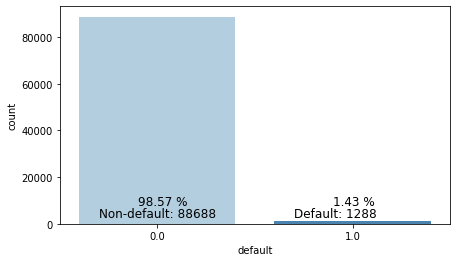

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(x='default', data=df_default, palette="Blues")
plt.annotate('Non-default: {}'.format(non_defaulted), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(defaulted), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(non_defaulted_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(defaulted_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
None #don't show the label objects

In [29]:
defaulted

1288

In [30]:
non_defaulted

88688

#### As we can see on the plot above we have highly unbalanced dataset non-default class 98.57% of cases in data and default only 1.43%

#### To deal with this it is useful to choose right performance metrics. Accuracy is not a good measure when working with imbalanced datasets:
- from confusion matrix we can calculate **precision**, **recall**, **f1 score**, **ROC**
- try models that are effective with unbalanced dataset - Decision trees (Random Forests, Gradient Boosted Trees, etc)
- treat the problem as anomaly detection
- use undersampling, random oversampling, SMOTE techniques
- class_weights, we can specify a higher weight for the minority class using a dictionary
- threshold shifting


#### There are different aproaches and techniques for working with unbalanced datase, but due to limited time for this case study and being adviced to avoid spending too much time optimizing prediction results I will focus only on a few. (Check below data preprocessing part)

### EDA

In [31]:
# plt.figure(figsize=(20,15))
# plot = sns.countplot('merchant_group',data=df_default)
# plt.setp(plot.get_xticklabels(), rotation=45)

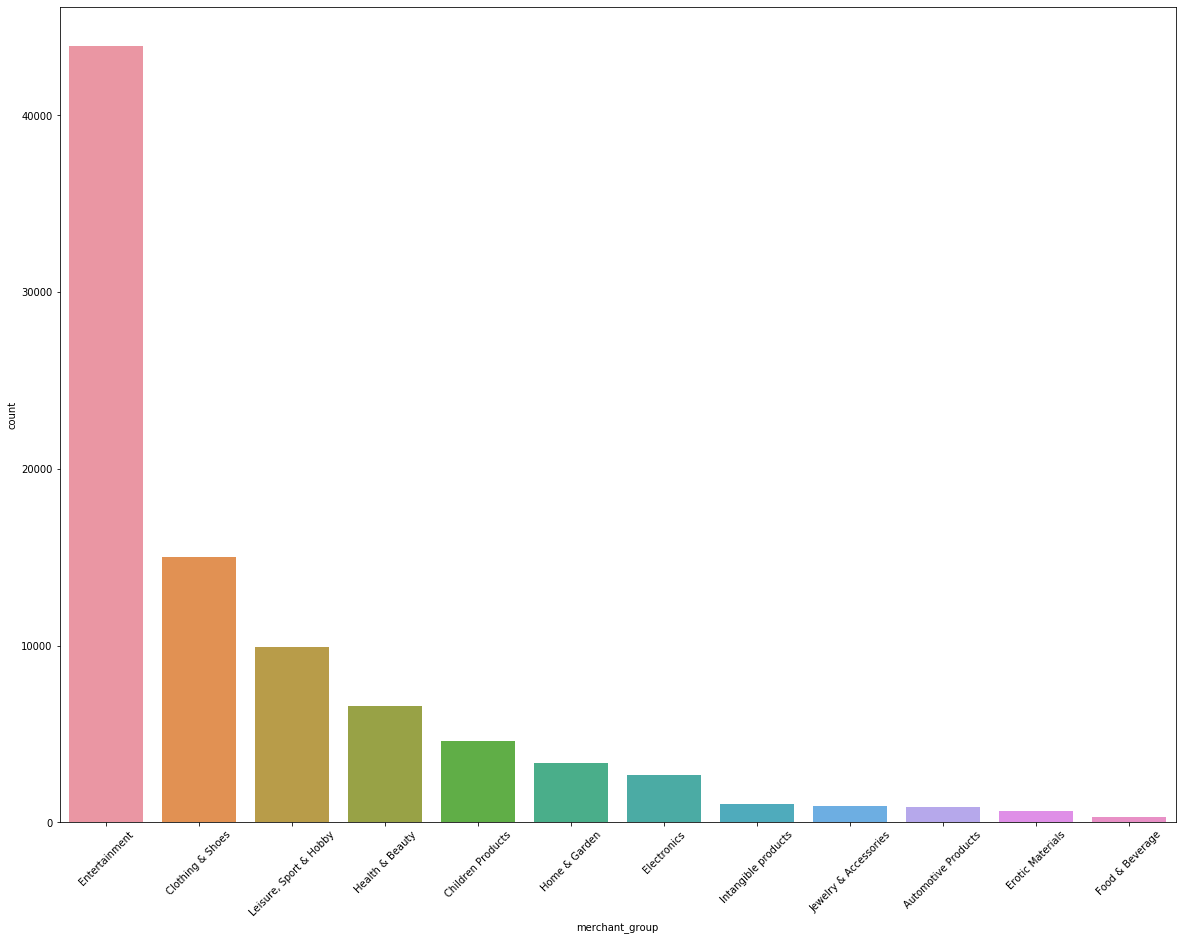

In [32]:
plt.figure(figsize=(20,15))
plot = sns.countplot(x='merchant_group',data=df_default, order = df_default['merchant_group'].value_counts().index)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)
None #don't show the label objects

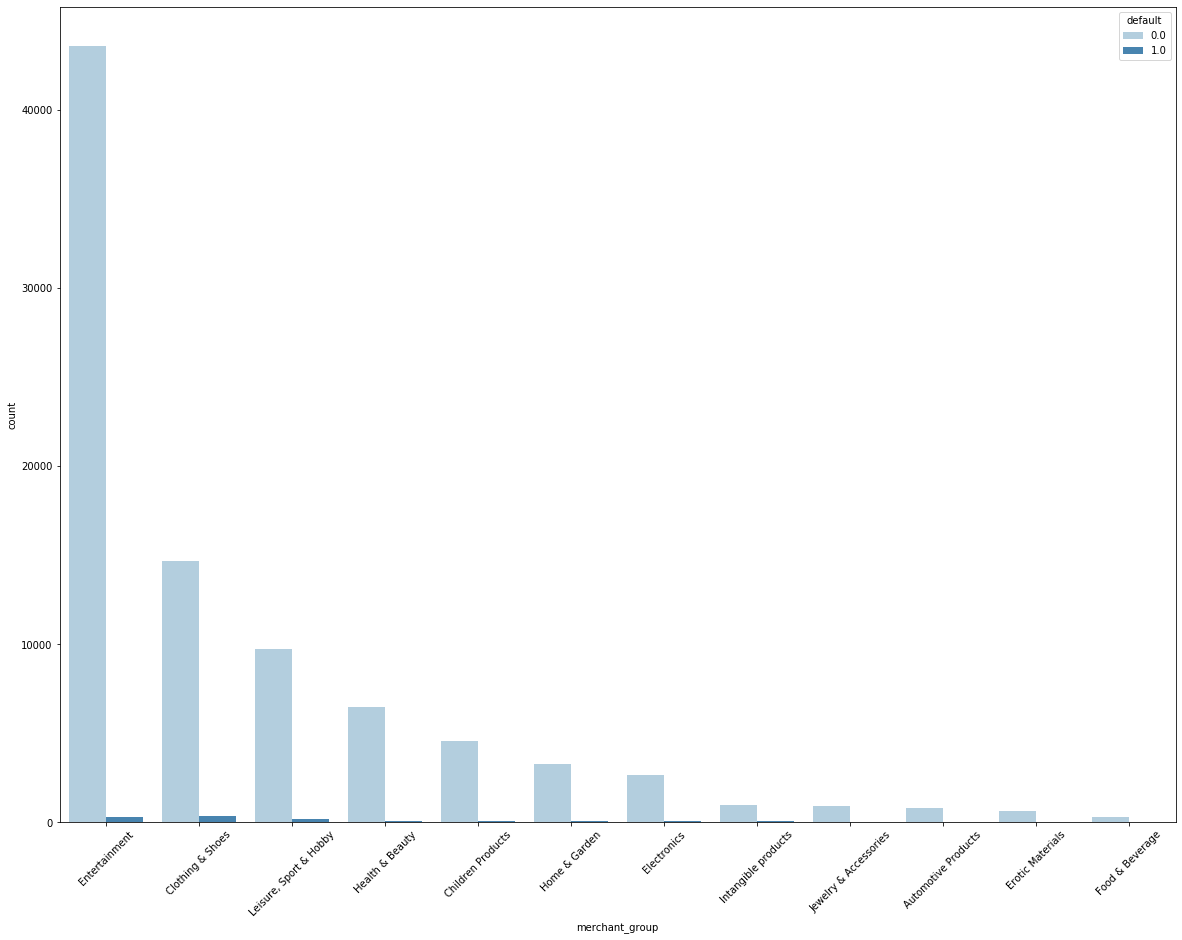

In [33]:
plt.figure(figsize=(20,15))
plot=sns.countplot(x='merchant_group',data=df_default, palette="Blues", hue='default', 
                   order = df_default['merchant_group'].value_counts().index)
plt.xticks(rotation=45)
None #don't show the label objects

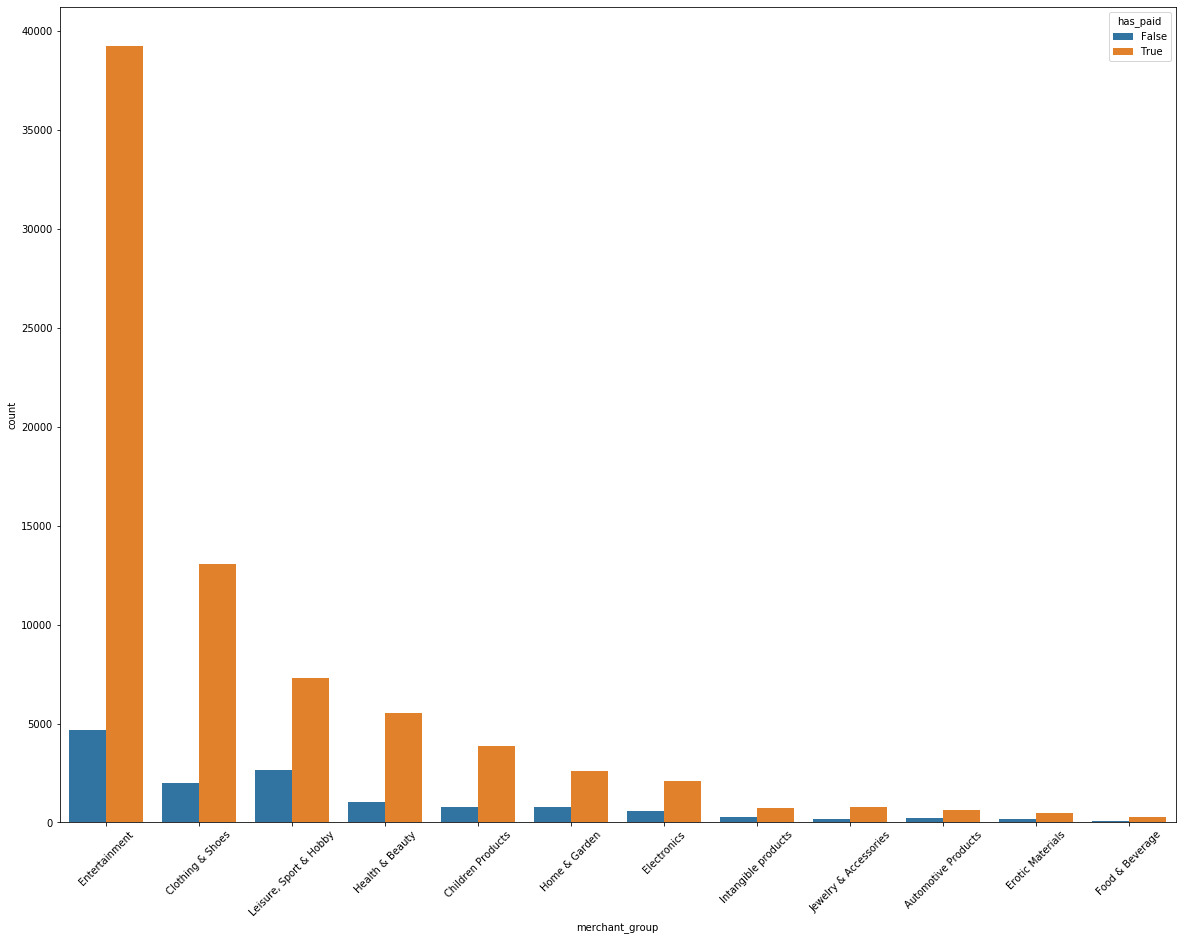

In [34]:
plt.figure(figsize=(20,15))
plot = sns.countplot(x='merchant_group',data=df_default, hue='has_paid', 
                     order = df_default['merchant_group'].value_counts().index)
plt.xticks(rotation=45)
None #don't show the label objects

In [35]:
# import sys
# !{sys.executable} -m pip install -U seaborn

In [36]:
# for col in df_default.columns:
#     plt.figure(figsize=(10,5))
# #     sns.histplot(df_default[col])
#     sns.histplot(df_default[col], kde=True)
# #     plt.xticks(rotation='vertical')
# #     plt.show()

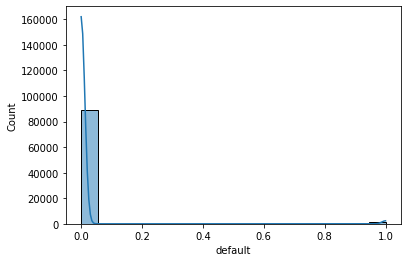

In [37]:
sns.histplot(df_default["default"], kde=True)

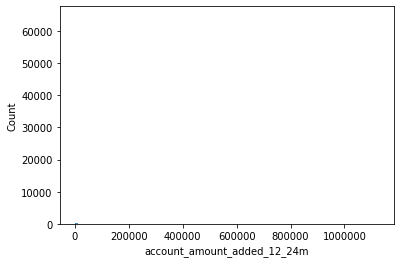

In [38]:
sns.histplot(df_default["account_amount_added_12_24m"])

C:\Users\anna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


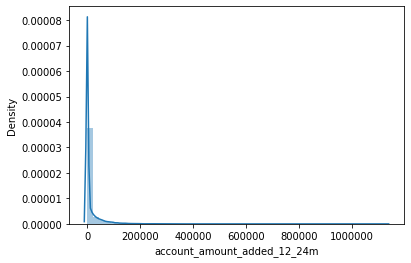

In [39]:
sns.distplot(df_default["account_amount_added_12_24m"])

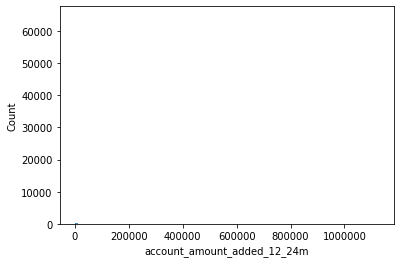

In [40]:
sns.histplot(data=df_default, x="account_amount_added_12_24m")

In [41]:
df_default.columns

Index(['uuid', 'default', 'account_amount_added_12_24m',
       'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',

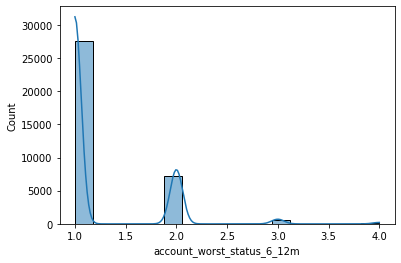

In [42]:
sns.histplot(df_default["account_worst_status_6_12m"], kde=True)

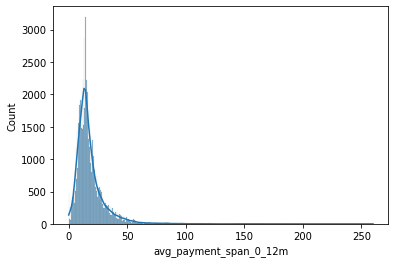

In [43]:
sns.histplot(df_default["avg_payment_span_0_12m"], kde=True)

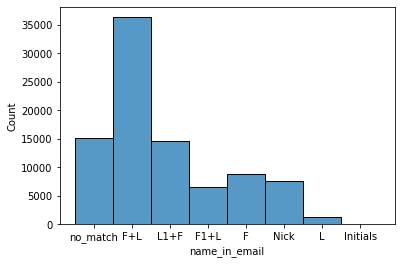

In [44]:
sns.histplot(df_default["name_in_email"])

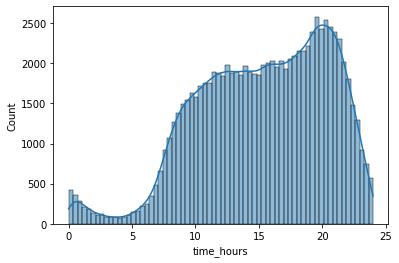

In [45]:
sns.histplot(df_default["time_hours"], kde=True) 

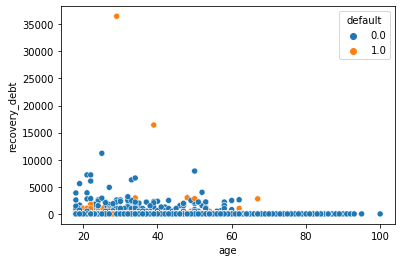

In [46]:
sns.scatterplot(data = df_default, x ='age', y = 'recovery_debt', hue = 'default')

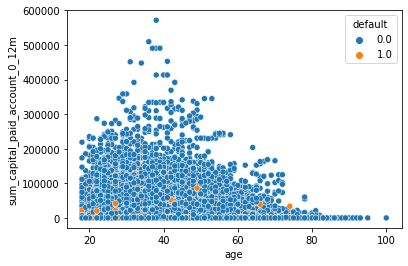

In [47]:
sns.scatterplot(data = df_default, x ='age', y = 'sum_capital_paid_account_0_12m', hue = 'default')

## Data preprocessing
- missing data
- collinearity
- encoding categorical data
- handling unbalanced dataset


### Missing data

In [48]:
percent_missing = round(df_default.isnull().sum()/ len(df_default)* 100, 2)
missing_value_df = pd.DataFrame({'column_name': df_default.columns,
                                 'percent_missing': percent_missing})

In [49]:
percent_missing.sort_values(ascending=False)

worst_status_active_inv                69.51
account_worst_status_12_24m            66.75
account_worst_status_6_12m             60.36
account_incoming_debt_vs_paid_0_24m    59.30
account_worst_status_3_6m              57.72
account_status                         54.39
account_worst_status_0_3m              54.39
avg_payment_span_0_3m                  49.33
avg_payment_span_0_12m                 23.86
num_active_div_by_paid_inv_0_12m       22.96
num_arch_written_off_12_24m            18.12
num_arch_written_off_0_12m             18.12
account_days_in_term_12_24m            11.87
account_days_in_dc_12_24m              11.87
account_days_in_rem_12_24m             11.87
sum_capital_paid_account_0_12m          0.00
age                                     0.00
status_max_archived_0_12_months         0.00
status_max_archived_0_24_months         0.00
recovery_debt                           0.00
status_2nd_last_archived_0_24m          0.00
sum_capital_paid_account_12_24m         0.00
sum_paid_i

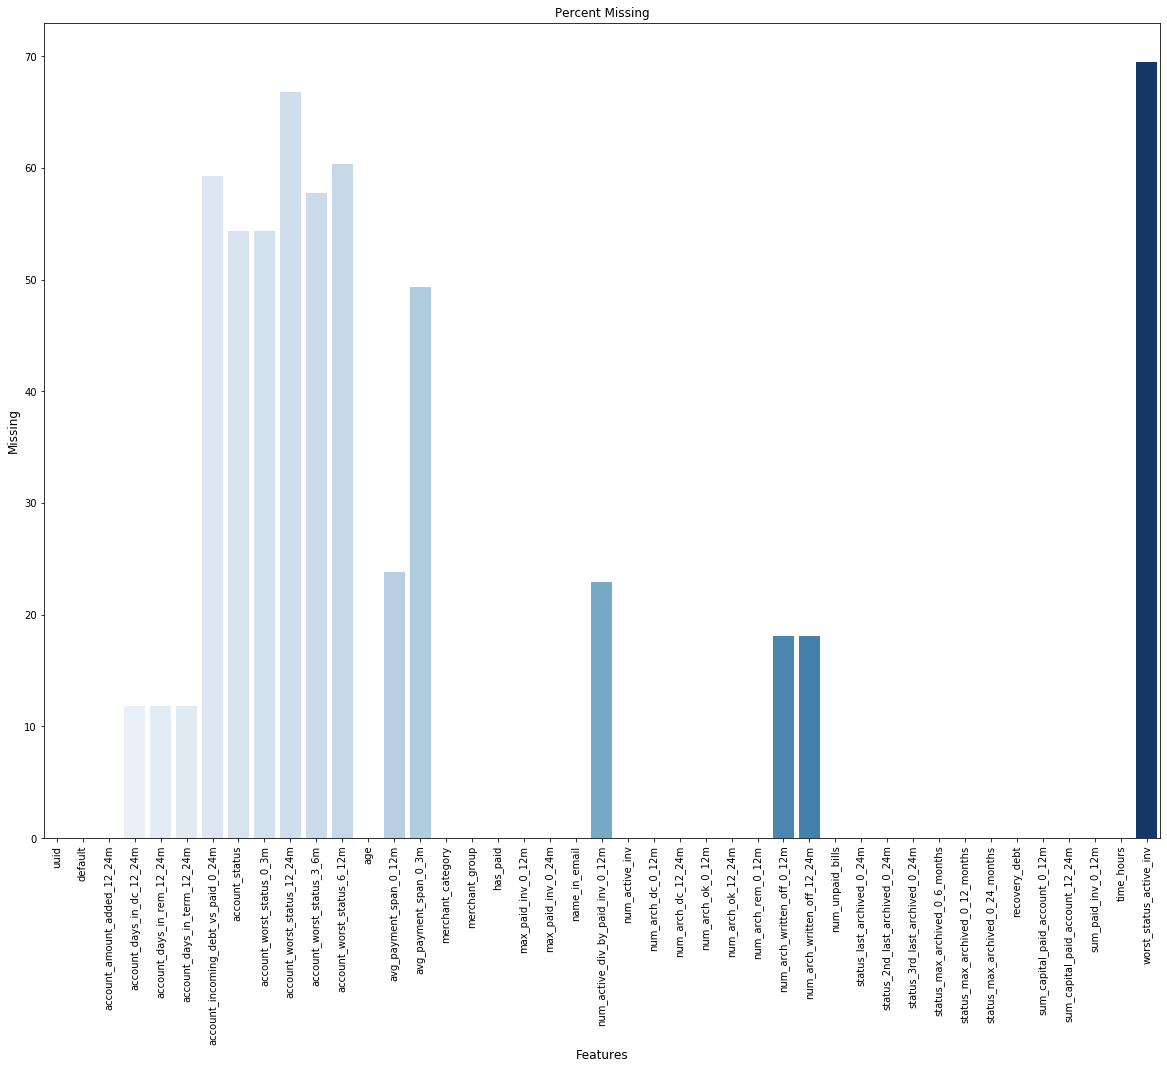

In [50]:
plt.figure(figsize=(20,15))
sns.barplot(x=missing_value_df.index, y=missing_value_df['percent_missing'], data=missing_value_df, palette="Blues")
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
None #don't show the label objects

In [51]:
# import sys
# !{sys.executable} -m pip install missingno

In [52]:
import missingno as msno

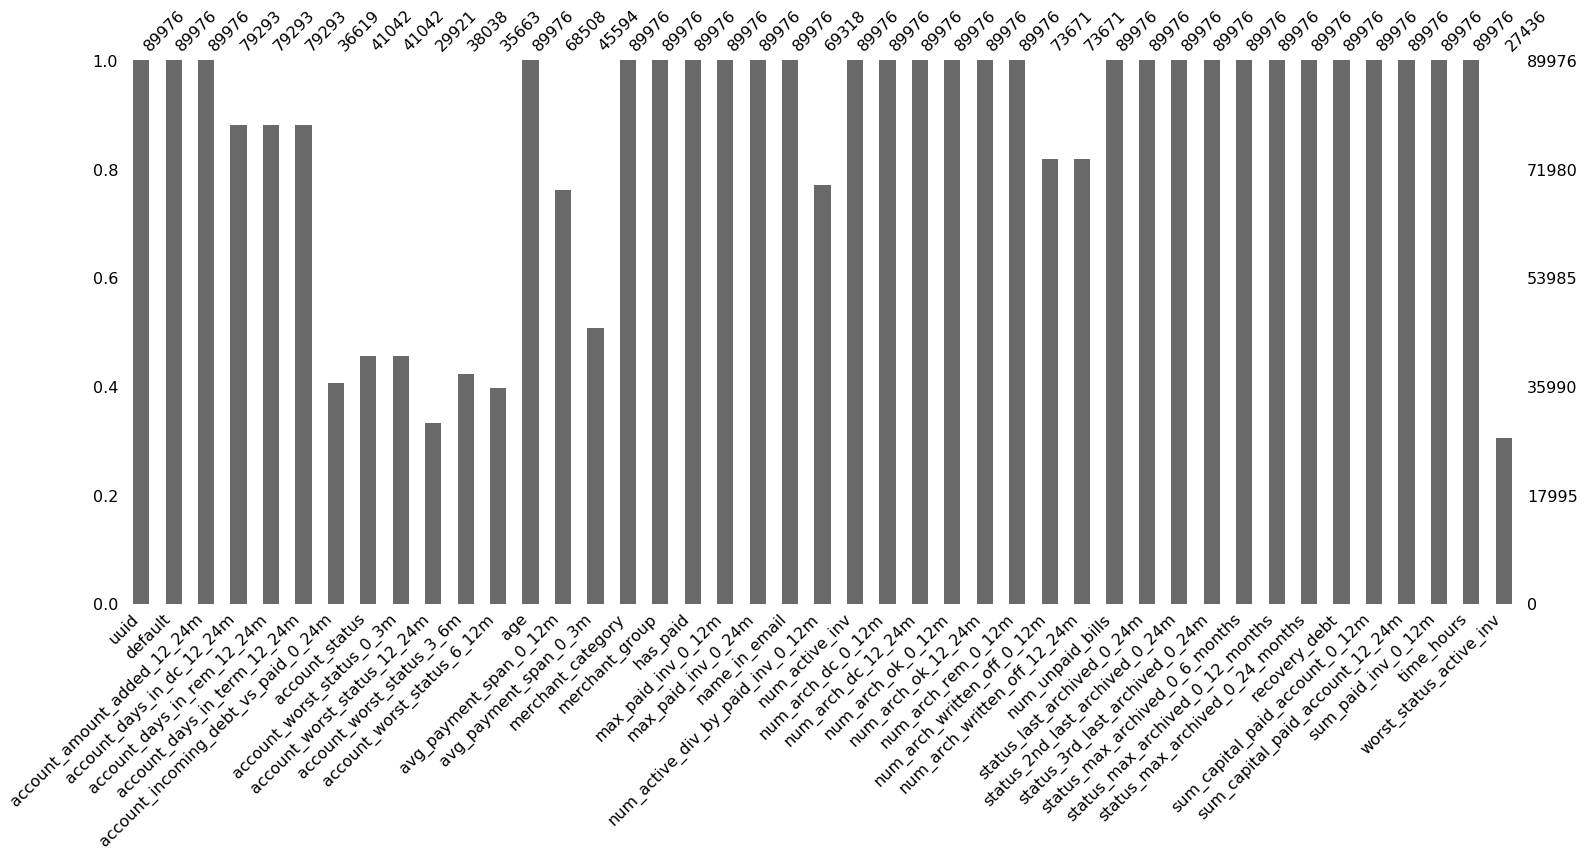

In [53]:
msno.bar(df_default)

In [54]:
missing_value_df[missing_value_df['percent_missing']>50]

,column_name,percent_missing
account_incoming_debt_vs_paid_0_24m,account_incoming_debt_vs_paid_0_24m,59.30
account_status,account_status,54.39
account_worst_status_0_3m,account_worst_status_0_3m,54.39
account_worst_status_12_24m,account_worst_status_12_24m,66.75
account_worst_status_3_6m,account_worst_status_3_6m,57.72
account_worst_status_6_12m,account_worst_status_6_12m,60.36
worst_status_active_inv,worst_status_active_inv,69.51


#### Columns above have more than 50% missing data. Since I do not have information why data is missing I have decided to eliminate those columns.   
#### Maybe at later stage with more domain knowledge and analysis I will try to build model with imputed missing data

In [55]:
col_to_delete = missing_value_df[missing_value_df['percent_missing']>50].index.to_list()

In [56]:
col_to_delete

['account_incoming_debt_vs_paid_0_24m',
 'account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'worst_status_active_inv']

In [57]:
df_default = df_default.drop(col_to_delete, axis = 1)

In [58]:
missing_value_df[(missing_value_df['percent_missing']>0)&(missing_value_df['percent_missing']<30)].index.to_list()

['account_days_in_dc_12_24m',
 'account_days_in_rem_12_24m',
 'account_days_in_term_12_24m',
 'avg_payment_span_0_12m',
 'num_active_div_by_paid_inv_0_12m',
 'num_arch_written_off_0_12m',
 'num_arch_written_off_12_24m']

#### Columns above have less than 30% missing data. I will build the model by deleting rows where data is missing, at later stage I will try by imputing the missing data.

In [59]:
df_default.shape

(89976, 36)

In [60]:
df_default = df_default.dropna()

In [61]:
df_default.shape

(39973, 36)

In [62]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39973 entries, 0 to 89974
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uuid                              39973 non-null  object 
 1   default                           39973 non-null  float64
 2   account_amount_added_12_24m       39973 non-null  int64  
 3   account_days_in_dc_12_24m         39973 non-null  float64
 4   account_days_in_rem_12_24m        39973 non-null  float64
 5   account_days_in_term_12_24m       39973 non-null  float64
 6   age                               39973 non-null  int64  
 7   avg_payment_span_0_12m            39973 non-null  float64
 8   avg_payment_span_0_3m             39973 non-null  float64
 9   merchant_category                 39973 non-null  object 
 10  merchant_group                    39973 non-null  object 
 11  has_paid                          39973 non-null  bool   
 12  max_

In [63]:
X = df_default.drop(["uuid", "default"], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39973 entries, 0 to 89974
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   account_amount_added_12_24m       39973 non-null  int64  
 1   account_days_in_dc_12_24m         39973 non-null  float64
 2   account_days_in_rem_12_24m        39973 non-null  float64
 3   account_days_in_term_12_24m       39973 non-null  float64
 4   age                               39973 non-null  int64  
 5   avg_payment_span_0_12m            39973 non-null  float64
 6   avg_payment_span_0_3m             39973 non-null  float64
 7   merchant_category                 39973 non-null  object 
 8   merchant_group                    39973 non-null  object 
 9   has_paid                          39973 non-null  bool   
 10  max_paid_inv_0_12m                39973 non-null  float64
 11  max_paid_inv_0_24m                39973 non-null  float64
 12  name

In [64]:
y = df_default[["default"]]
y.head()

,default
0,0.0
1,0.0
2,0.0
4,0.0
6,0.0


### Collinearity

#### Correlation between numerical

In [65]:
corr = X.select_dtypes(include=["number"]).corr()

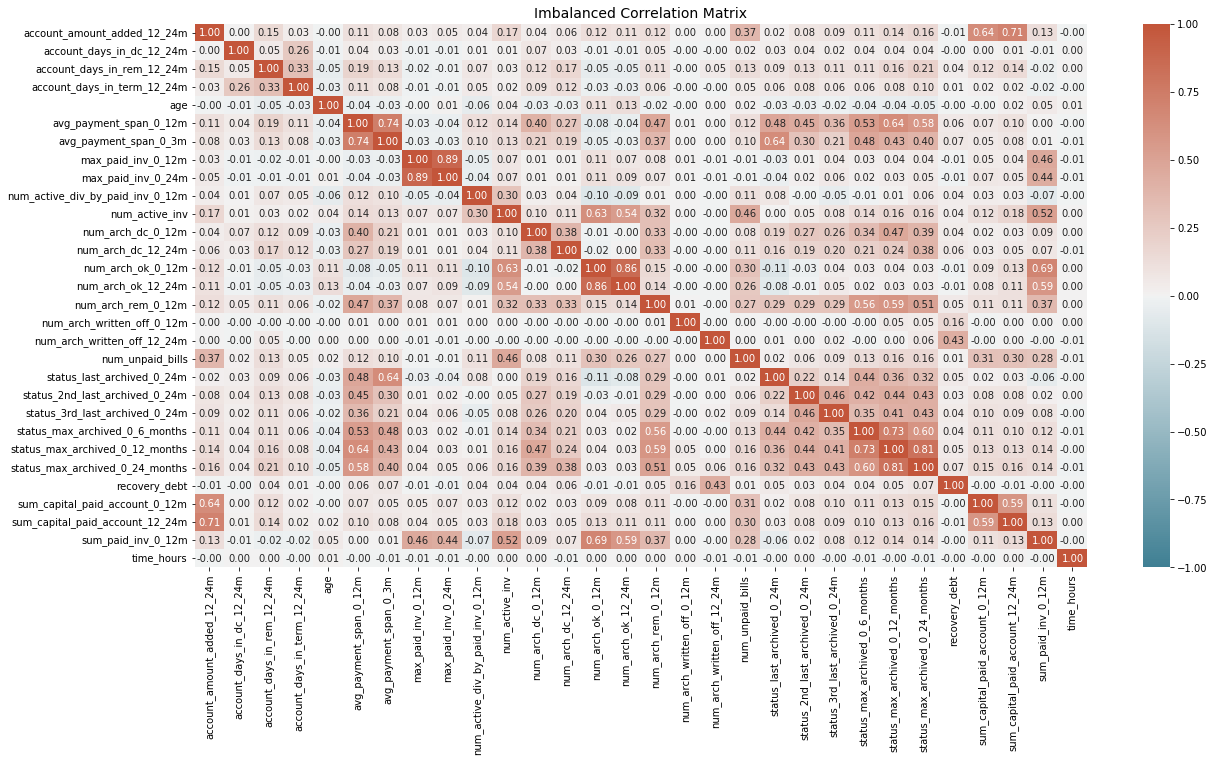

In [66]:
cmap_color = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap=cmap_color, annot_kws={"size":10}, annot=True, 
            vmax=1.0, vmin=-1.0, center=0, fmt=".2f", ax=ax ) #,square=True)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
sns.set_context(rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10}) 

In [67]:
# import sys
# !{sys.executable} -m pip install collinearity

In [68]:
from collinearity import SelectNonCollinear

In [69]:
selector = SelectNonCollinear(correlation_threshold=0.8)

features = X.select_dtypes(include=["number"]).columns.to_list()

X_arr = X.select_dtypes(include=["number"]).to_numpy()

selector.fit(X_arr,np.ravel(y)) 
mask = selector.get_support()

# X_new = pd.DataFrame(X_arr[:,mask],columns = np.array(features)[mask])

remove_corr_col = list(set(X.select_dtypes(include=["number"]))-set(np.array(features)[mask]))

# remove the highly correlated columns
X.drop(remove_corr_col, axis=1, inplace=True)

print("Removed highly correlated columns:{}".format(remove_corr_col))

Removed highly correlated columns:['status_max_archived_0_24_months', 'max_paid_inv_0_24m', 'num_arch_ok_0_12m']


In [70]:
X.shape

(39973, 31)

#### As we can see on correlation plot, there features that are highly correlated:
- num_arch_ok_0_12m and num_arch_ok_12_24m
- status_max_archived_0_12_months and status_max_archived_0_24_months
- max_padi_inv_0_12m and max_padi_inv_0_24m

#### By using SelectNonCollinear package I have removed highly correlated columns: 'num_arch_ok_0_12m', 'status_max_archived_0_24_months', 'max_paid_inv_0_24m'


### Scaling

na numerical join with encoded categorical

pipeline: missing (loceno), scale , onehot, oversampling

### Encoding categorical data

In [71]:
# we do not need uuid - eliminate from categorical columns
X_categorical = X[categorical_col[1:]]
categorical_col[1:]

['merchant_category', 'merchant_group', 'name_in_email']

In [72]:
X_categorical.head()

,merchant_category,merchant_group,name_in_email
0,Dietary supplements,Health & Beauty,no_match
1,Books & Magazines,Entertainment,F+L
2,Diversified entertainment,Entertainment,L1+F
4,Electronic equipment & Related accessories,Electronics,F+L
6,Concept stores & Miscellaneous,"Leisure, Sport & Hobby",L1+F


In [73]:
for col in X_categorical.columns:
    print(col, ':', len(X_categorical[col].unique()), ' categories')

merchant_category : 56  categories
merchant_group : 12  categories
name_in_email : 8  categories


- As we can see categorical feature merchant_category has a large number of categories present in data and OneHotEncoding may not be as effective.
- It introduce sparsity in the dataset, and might lead to a Dummy variable trap.
- Due to the massive increase in the dataset, encoding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive.

Since **merchant_category** and **merchant_group** are similar features and map data (merchant_category) to several larger categories (merchant_group) we can use only merchant_group. But I will try to build model with only merchant_group feature at later stage. 

In [74]:
encoder = OneHotEncoder(drop='first')
x_one_hot = encoder.fit_transform(X_categorical)
x_one_hot = pd.DataFrame(x_one_hot.toarray())

In [75]:
x_one_hot.shape

(39973, 73)

In [76]:
# print("Saving the encoder to  ./artifacts/one_hot_encoder.pkl file ")
# pickle.dump(encoder, open('../artifacts/one_hot_encoder.pkl', 'wb'))
pickle.dump(encoder, open('./one_hot_encoder.pkl', 'wb'))

In [77]:
X_last = pd.concat([X.drop(["merchant_category", "merchant_group", "name_in_email"], axis = 1),x_one_hot.set_index(X.index)],
                       axis=1)

In [78]:
X_last.head()

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,has_paid,max_paid_inv_0_12m,num_active_div_by_paid_inv_0_12m,...,63,64,65,66,67,68,69,70,71,72
0,0,0.0,0.0,0.0,20,12.692308,8.333333,True,31638.0,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,0.0,50,25.833333,25.000000,True,13749.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,22,20.000000,18.000000,True,29890.0,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0.0,0.0,25,13.000000,13.000000,True,7100.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,142.0,0.0,49,3.000000,3.000000,True,2373.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
X_last.shape

(39973, 101)

#### Oversampling

As mentioned above dataset is highly imbalanced. 
- If we perform **under-sampling** we will lose lot of information since we have 1288 positive cases and 88688 negative cases, so I have decided to do **over-sampling**

In [80]:
# transform the dataset
oversample = SMOTE(random_state=101)
X_last, y = oversample.fit_resample(X_last, y)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [81]:
print(y.default.value_counts())

1.0    39730
0.0    39730
Name: default, dtype: int64


In [82]:
X_last.head()

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,has_paid,max_paid_inv_0_12m,num_active_div_by_paid_inv_0_12m,...,63,64,65,66,67,68,69,70,71,72
0,0,0.0,0.0,0.0,20,12.692308,8.333333,True,31638.0,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,0.0,50,25.833333,25.000000,True,13749.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,22,20.000000,18.000000,True,29890.0,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.0,0.0,0.0,25,13.000000,13.000000,True,7100.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,142.0,0.0,49,3.000000,3.000000,True,2373.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Split TRAIN TEST dataset

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X_last, y, random_state=0)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_last, y, random_state=0, test_size = 0.3, stratify=y)

In [85]:
print(y_train['default'].value_counts(normalize=True))
print(y_test['default'].value_counts(normalize=True))

1.0    0.5
0.0    0.5
Name: default, dtype: float64
0.0    0.5
1.0    0.5
Name: default, dtype: float64


#### As we can see after oversampling we have 50%-50% labels

### Modelling
- Logistic regression
- Random forest


#### Logistic regression

In [86]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train.default)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [87]:
test_pred = logreg.predict(X_test)
test_prob = logreg.predict_proba(X_test)[:, 1]

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


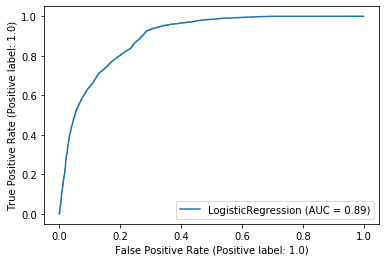

In [88]:
plot_roc_curve(logreg, X_test, y_test)

In [89]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.80     11919
         1.0       0.83      0.74      0.78     11919

    accuracy                           0.79     23838
   macro avg       0.80      0.79      0.79     23838
weighted avg       0.80      0.79      0.79     23838



In [90]:
print('Accuracy = {:.4f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.4f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.4f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.4f}'.format(f1_score(y_test, test_pred)))
print('AUC = {:.4f}'.format(roc_auc_score(y_test, test_prob)))

Accuracy = 0.7946
Precision = 0.8277
Recall = 0.7441
F1 score = 0.7837
AUC = 0.8948


In [91]:
scores = cross_validate(logreg, X_last, np.ravel(y), scoring=('accuracy','f1','roc_auc'), return_train_score=True)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  F

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [92]:
scores

{'fit_time': array([4.96649027, 4.49993253, 3.38627481, 4.5118897 , 3.45876408]),
 'score_time': array([0.98234749, 0.51843333, 0.51442099, 0.6860764 , 0.53800559]),
 'test_accuracy': array([0.79499119, 0.79385855, 0.78857287, 0.79020891, 0.79901837]),
 'train_accuracy': array([0.79234835, 0.79277309, 0.79480242, 0.79310345, 0.79296187]),
 'test_f1': array([0.78423841, 0.78318994, 0.7784518 , 0.77958482, 0.78774588]),
 'train_f1': array([0.78105822, 0.78189314, 0.78530516, 0.78174577, 0.78228648]),
 'test_roc_auc': array([0.89365918, 0.89378742, 0.89019336, 0.89114788, 0.89781092]),
 'train_roc_auc': array([0.89283975, 0.89304309, 0.8939889 , 0.8933909 , 0.89346366])}

In [93]:
pd.DataFrame(scores).round(4).iloc[:,2:]

,test_accuracy,train_accuracy,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.7950,0.7923,0.7842,0.7811,0.8937,0.8928
1,0.7939,0.7928,0.7832,0.7819,0.8938,0.8930
2,0.7886,0.7948,0.7785,0.7853,0.8902,0.8940
3,0.7902,0.7931,0.7796,0.7817,0.8911,0.8934
4,0.7990,0.7930,0.7877,0.7823,0.8978,0.8935


In [ ]:
pipe =  Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=0, n_jobs=-1))])

In [ ]:
scores = cross_validate(logreg, X_last, np.ravel(y), scoring=('accuracy','f1','roc_auc'), return_train_score=True)

In [94]:
# for i, score in enumerate(cross_validate(logreg, X_last,np.ravel(y), cv=3)["test_score"]):
#     print("Accuracy for the fold no. {} on the test set: {:.4f}".format(i, score))

In [95]:
def confusion_matrix_plot(y_test, y_pred):

    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_matrix = cf_matrix.astype(int)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
#     sns.set(font_scale=1)
    fig, ax = plt.subplots(figsize=(7,4))
    cf_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
    # cf_plot = sns.heatmap(cf_matrix, annot=labels,cmap="YlGn")
    cf_plot.set(xlabel="Predicted values", ylabel = "Actual values")
    fig = cf_plot.get_figure()
    fig.savefig("confusion_matrix.png")

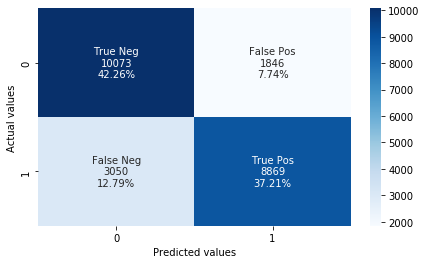

In [96]:
confusion_matrix_plot(y_test, test_pred)

#### Random forest 

In [97]:
# train a randomforest classifier
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_clf.fit(X_train, np.ravel(y_train))

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(n_jobs=-1, random_state=0)

In [98]:
pipe =  Pipeline([('scaler', StandardScaler()), LogisticRegression(random_state=0)])

In [99]:
pipe.fit(X_train, y_train)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(n_jobs=-1, random_state=0))])

In [100]:
pipe.predict(X_test)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([1., 1., 0., ..., 1., 0., 1.])

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


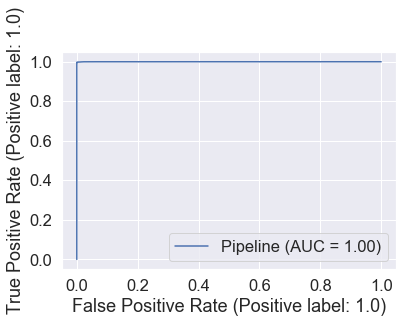

In [126]:
plot_roc_curve(pipe, X_test, y_test)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


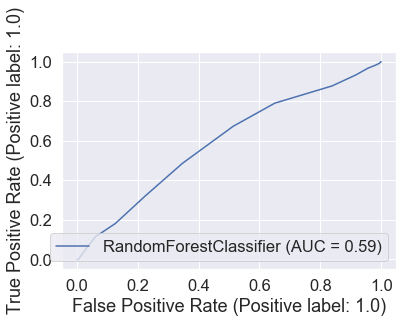

In [117]:
# pipe[1]
plot_roc_curve(pipe[1], X_test, y_test)

In [116]:
pipe[1]

RandomForestClassifier(n_jobs=-1, random_state=0)

In [101]:
test_pred = rf_clf.predict(X_test)
test_prob = rf_clf.predict_proba(X_test)[:, 1]

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


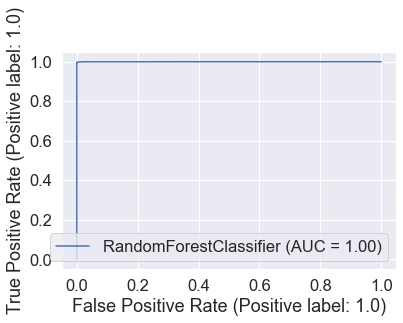

In [113]:
plot_roc_curve(rf_clf, X_test, y_test)

In [103]:
print('Accuracy = {:.4f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.4f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.4f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.4f}'.format(f1_score(y_test, test_pred)))
print('AUC = {:.4f}'.format(roc_auc_score(y_test, test_prob)))

Accuracy = 0.9976
Precision = 0.9997
Recall = 0.9956
F1 score = 0.9976
AUC = 0.9999


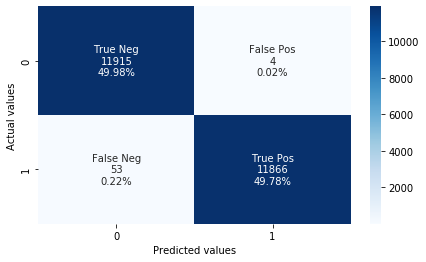

In [104]:
confusion_matrix_plot(y_test, test_pred)

In [105]:
def make_feature_importance_plot(df_importances):
#     if avg:
#         df_importances_avg = df_importances
#         #plot top 13 feature importance
#         top_importances = df_importances_avg.head(13)
#         plot_name = "feature_importances_avg_top13"
#         ylabel = "Top 13 features"
#     else:
#         top_importances = df_importances
#         plot_name = "feature_importances_model"
#         ylabel = "Model features"

#     top_importances.rename(
#         index=long_names_dict,
#         inplace=True)
        
    fig_imp = go.Figure(go.Bar(
                        x = df_importances["Gini-importance"],
                        y = df_importances.index,
                        orientation="h"
                    )
        )
        
    fig_imp.update_layout(
            autosize=False,
            width=600,
            height=900,
            yaxis=dict(autorange="reversed"),
            #yaxis_tickangle=15
            xaxis_title="Feature importance - Gini importance",
            yaxis_title=ylabel,
            xaxis = dict(
                    title = dict(
                        font = dict(
                                size = 16,
                        )
                    )

                ),
            font = dict(
                        family = "Arial"
                        )
            
    )
    fig_imp.write_image("rf_feat_import.png")

#     # save feature importances fig obj
#     pickle.dump(fig_imp, open(os.path.join(data_path, f"{plot_name}_obj.p"), "wb"))
#     mlflow.log_artifact(os.path.join(data_path, f"{plot_name}_obj.p"))

#     fig_imp.write_image(os.path.join(data_path, f"{plot_name}.png"))
#     mlflow.log_artifact(os.path.join(data_path, f"{plot_name}.png"))

In [106]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

df_importances = pd.DataFrame.from_dict(feats, orient="index").rename(columns={0: "Gini-importance"}).sort_values(by="Gini-importance", ascending = False)

In [118]:
 pipe[1].feature_importances_

array([1.20570592e-02, 6.35044950e-04, 3.62366939e-02, 8.93917664e-03,
       1.46432791e-02, 8.84912845e-02, 4.59748366e-02, 3.15264997e-05,
       2.81251432e-02, 1.04661091e-01, 1.33318952e-02, 7.24510350e-03,
       6.86205324e-03, 8.71402453e-02, 8.61512582e-03, 0.00000000e+00,
       1.32460680e-06, 3.73609291e-02, 3.06956393e-03, 1.35269036e-02,
       2.16039413e-02, 5.57085793e-03, 6.75959034e-03, 2.57617251e-03,
       2.00821866e-02, 1.09793203e-02, 4.23323247e-02, 1.22782827e-02,
       3.91954441e-04, 0.00000000e+00, 5.38201866e-04, 1.09660047e-02,
       9.34818599e-04, 1.63054090e-03, 7.19691635e-05, 0.00000000e+00,
       2.44477759e-05, 2.83247189e-03, 3.24644207e-04, 1.47022297e-04,
       3.89973739e-03, 2.73066738e-04, 4.31191948e-03, 1.01031271e-04,
       5.86102893e-04, 6.45150797e-04, 8.83253297e-06, 2.14169811e-03,
       7.39905015e-04, 5.25821953e-02, 2.40580581e-04, 4.44255302e-04,
       1.10825040e-05, 0.00000000e+00, 9.43434131e-04, 8.86980864e-05,
      

In [124]:
 rf_clf.feature_importances_

array([1.20570592e-02, 6.35044950e-04, 3.62366939e-02, 8.93917664e-03,
       1.46432791e-02, 8.84912845e-02, 4.59748366e-02, 3.15264997e-05,
       2.81251432e-02, 1.04661091e-01, 1.33318952e-02, 7.24510350e-03,
       6.86205324e-03, 8.71402453e-02, 8.61512582e-03, 0.00000000e+00,
       1.32460680e-06, 3.73609291e-02, 3.06956393e-03, 1.35269036e-02,
       2.16039413e-02, 5.57085793e-03, 6.75959034e-03, 2.57617251e-03,
       2.00821866e-02, 1.09793203e-02, 4.23323247e-02, 1.22782827e-02,
       3.91954441e-04, 0.00000000e+00, 5.38201866e-04, 1.09660047e-02,
       9.34818599e-04, 1.63054090e-03, 7.19691635e-05, 0.00000000e+00,
       2.44477759e-05, 2.83247189e-03, 3.24644207e-04, 1.47022297e-04,
       3.89973739e-03, 2.73066738e-04, 4.31191948e-03, 1.01031271e-04,
       5.86102893e-04, 6.45150797e-04, 8.83253297e-06, 2.14169811e-03,
       7.39905015e-04, 5.25821953e-02, 2.40580581e-04, 4.44255302e-04,
       1.10825040e-05, 0.00000000e+00, 9.43434131e-04, 8.86980864e-05,
      

In [122]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, pipe[1].feature_importances_):
    feats[feature] = importance #add the name/value pair 

df_importances = pd.DataFrame.from_dict(feats, orient="index").rename(columns={0: "Gini-importance"}).sort_values(by="Gini-importance", ascending = False)

In [123]:
df_importances

,Gini-importance
has_paid,0.104661
avg_payment_span_0_12m,0.088491
num_active_inv,0.087140
avg_payment_span_0_3m,0.045975
recovery_debt,0.042332
num_arch_rem_0_12m,0.037361
account_days_in_rem_12_24m,0.036237
merchant_group,0.028125
num_unpaid_bills,0.021604
status_max_archived_0_6_months,0.020082


In [107]:
df_importances

,Gini-importance
has_paid,0.104661
avg_payment_span_0_12m,0.088491
num_active_inv,0.087140
avg_payment_span_0_3m,0.045975
recovery_debt,0.042332
num_arch_rem_0_12m,0.037361
account_days_in_rem_12_24m,0.036237
merchant_group,0.028125
num_unpaid_bills,0.021604
status_max_archived_0_6_months,0.020082


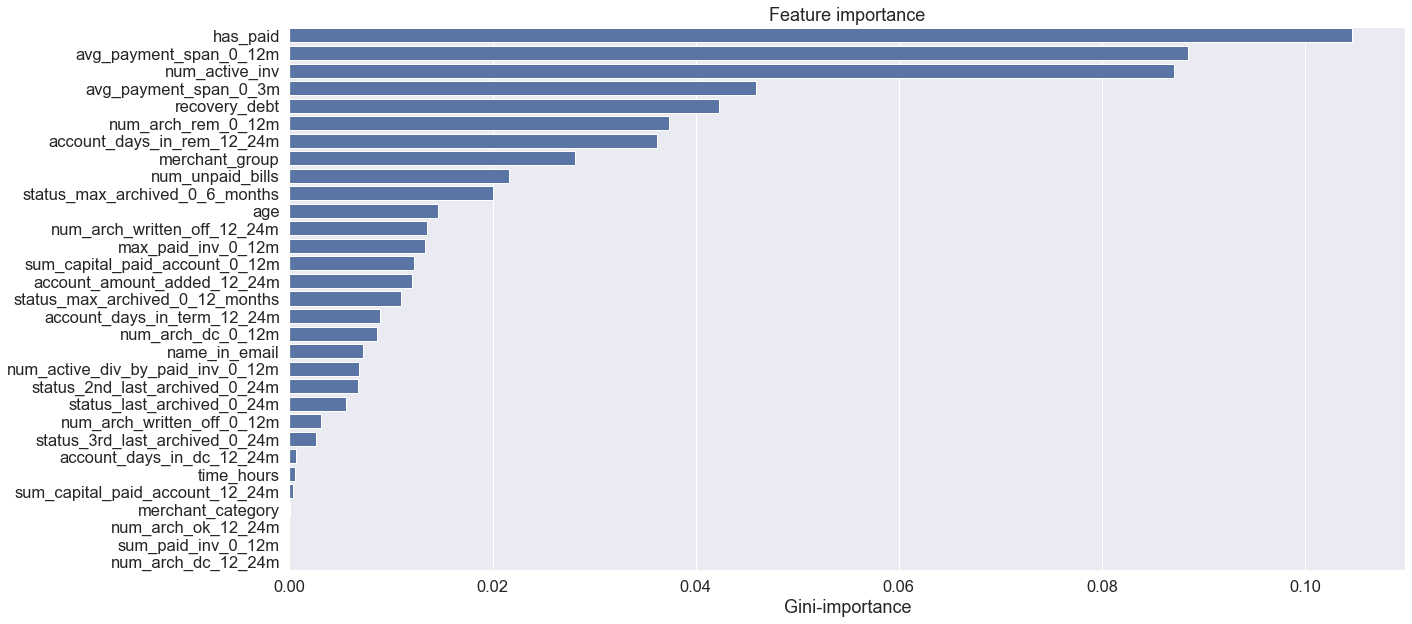

In [108]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(20,10))

plot = sns.barplot(x="Gini-importance", y=df_importances.index,data=df_importances,  label="Total", color="b")
plot.set_title("Feature importance")
None #don't show the label objects

In [127]:
scores = cross_validate(rf_clf, X_last, np.ravel(y), scoring=('accuracy','f1','roc_auc'), return_train_score=True)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site

In [110]:
pd.DataFrame(scores).round(4).iloc[:,2:]

,test_accuracy,train_accuracy,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.9901,1.0,0.9900,1.0,0.9998,1.0
1,0.9999,1.0,0.9999,1.0,1.0000,1.0
2,0.9999,1.0,0.9999,1.0,1.0000,1.0
3,0.9998,1.0,0.9998,1.0,1.0000,1.0
4,0.9998,1.0,0.9998,1.0,1.0000,1.0


In [125]:
scores = cross_validate(pipe, X_last, np.ravel(y), scoring=('accuracy','f1','roc_auc'), return_train_score=True)

C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\anna\anaconda3\lib\site

#### Overfitting